## Damiso and Jamie version


# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline
%config Completer.use_jedi = False


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json




In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# Import API key
from api_keys import damiso

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# creating sample size for testing
sample_size = 5

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=sample_size)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=sample_size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


5

In [6]:
print(cities)

['camana', 'sarrebourg', 'tuktoyaktuk', 'grand gaube', 'katsuura']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# url does not have the city
url = f"http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID={damiso}&q="


In [8]:
# Delete later...this is a test
# test_url = url + "richmond"
# test_url

In [9]:
# set up lists to hold reponse info
city_list = []
city_counter = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(f'Getting request {city_counter} for {city}')
    try:
        
        response = requests.get(url + city).json()
        # print(response)

        # getting latitude
        city_lat = response['coord']['lat']

        #getting longitude
        city_long = response['coord']['lon']

        #getting temp. max
        city_temp_max = response['main']['temp_max']

        #getting city humidity
        city_humidity = response['main']['humidity']

        #getting city
        city_cloudiness = response['clouds']['all']

        #getting city windspeed
        city_windspeed = response ['wind']['speed']

        #getting description
        description_test = response ['weather'][0]['description']



        # create dictionary of city data
        city_list.append({
            "City": city,
            "Lat": city_lat,
            "Long": city_long,
            "Temp. Max": city_temp_max,
            "Humidity": city_humidity,
            "Cloudiness": city_cloudiness,
            "Windspeed": city_windspeed,
            "description": description_test
        })
        city_counter += 1
    except:
        print("city not found")
        city_counter += 1
        
print("Reached the end of city list")        

Getting request 1 for camana
Getting request 2 for sarrebourg
Getting request 3 for tuktoyaktuk
Getting request 4 for grand gaube
Getting request 5 for katsuura
Reached the end of city list


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# creating a data frame
city_data_df = pd.DataFrame(city_list)
city_data_df

,City,Lat,Long,Temp. Max,Humidity,Cloudiness,Windspeed,description
0,camana,-16.6228,-72.7111,65.79,87,58,6.02,broken clouds
1,sarrebourg,48.7333,7.0500,48.00,81,0,4.61,clear sky
2,tuktoyaktuk,69.4541,-133.0374,24.84,80,100,3.27,overcast clouds
3,grand gaube,-20.0064,57.6608,82.99,79,19,7.00,few clouds
4,katsuura,35.1333,140.3000,70.00,78,62,15.99,broken clouds


In [11]:
# test
# city_data_df.loc[2,"Humidity"] = 105
# city_data_df

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
city_data_df['Humidity'] > 100

0    False
1    False
2    False
3    False
4    False
Name: Humidity, dtype: bool

In [13]:
#  Get the indices of cities that have humidity over 100%.

cities_over_100 = city_data_df[(city_data_df['Humidity'] > 100)].index

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = city_data_df.drop(cities_over_100)
clean_city_data_df

,City,Lat,Long,Temp. Max,Humidity,Cloudiness,Windspeed,description
0,camana,-16.6228,-72.7111,65.79,87,58,6.02,broken clouds
1,sarrebourg,48.7333,7.0500,48.00,81,0,4.61,clear sky
2,tuktoyaktuk,69.4541,-133.0374,24.84,80,100,3.27,overcast clouds
3,grand gaube,-20.0064,57.6608,82.99,79,19,7.00,few clouds
4,katsuura,35.1333,140.3000,70.00,78,62,15.99,broken clouds


In [40]:
# Saving CSV file to output for vacay 
clean_city_data_df.to_csv('../output_data/cities.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

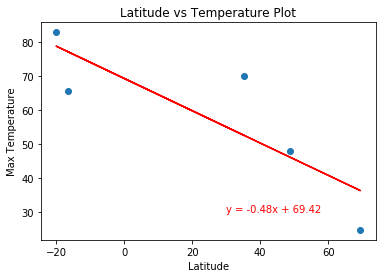

In [41]:
# identify x, y variables
x_values = clean_city_data_df['Lat']
x_values

y_values = clean_city_data_df['Temp. Max']
y_values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

# add regression line
plt.plot(x_values,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(30,30),fontsize=10,color="red")

plt.title('Latitude vs Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

plt.savefig('../output_data/lat_vs_temp.png')

plt.show()

## Latitude vs. Humidity Plot

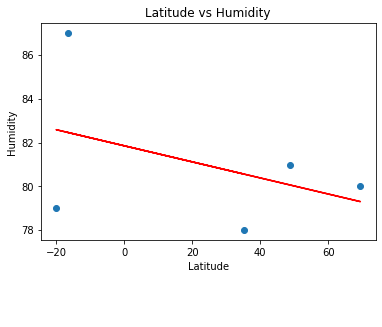

In [16]:
# identify x, y variables
x_values = clean_city_data_df['Lat']
x_values

y_values_humidity = clean_city_data_df['Humidity']
y_values

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values_humidity)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values_humidity)

# add regression line
plt.plot(x_values,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(20,74),fontsize=10,color="red")

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

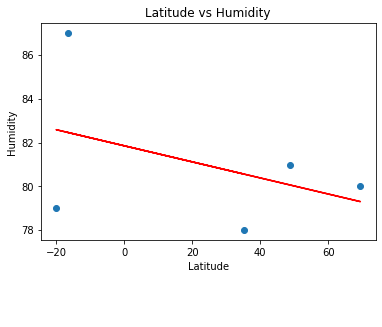

In [17]:
# identify x, y variables
x_values = clean_city_data_df['Lat']
x_values

y_values_humidity = clean_city_data_df['Humidity']
y_values_humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values_humidity)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values_humidity)

# add regression line
plt.plot(x_values,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(20,74),fontsize=10,color="red")

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Wind Speed Plot

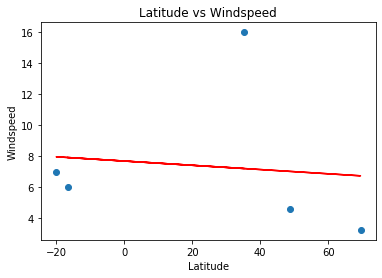

In [18]:
# identify x, y variables
x_values = clean_city_data_df['Lat']
x_values

y_values_windspeed = clean_city_data_df['Windspeed']
y_values_windspeed

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values_windspeed)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values_windspeed)

# add regression line
plt.plot(x_values,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(20,2.5),fontsize=10,color="red")

plt.title('Latitude vs Windspeed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()

## Linear Regression

### create northern and southern data frames


In [19]:
northern_df = clean_city_data_df.loc[(clean_city_data_df['Lat'] >= 0)]
northern_df

,City,Lat,Long,Temp. Max,Humidity,Cloudiness,Windspeed,description
1,sarrebourg,48.7333,7.0500,48.00,81,0,4.61,clear sky
2,tuktoyaktuk,69.4541,-133.0374,24.84,80,100,3.27,overcast clouds
4,katsuura,35.1333,140.3000,70.00,78,62,15.99,broken clouds


In [20]:
southern_df = clean_city_data_df.loc[(clean_city_data_df['Lat'] < 0)]
southern_df


,City,Lat,Long,Temp. Max,Humidity,Cloudiness,Windspeed,description
0,camana,-16.6228,-72.7111,65.79,87,58,6.02,broken clouds
3,grand gaube,-20.0064,57.6608,82.99,79,19,7.00,few clouds


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

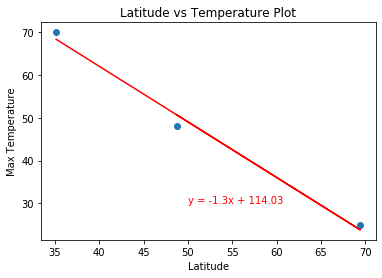

In [21]:
# identify x, y variables
x_values_northern = northern_df['Lat']
x_values_northern

y_values_northern_temp = northern_df['Temp. Max']
y_values_northern_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern,y_values_northern_temp)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_northern, y_values_northern_temp)

# add regression line
plt.plot(x_values_northern,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(50,30),fontsize=10,color="red")

plt.title('Latitude vs Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

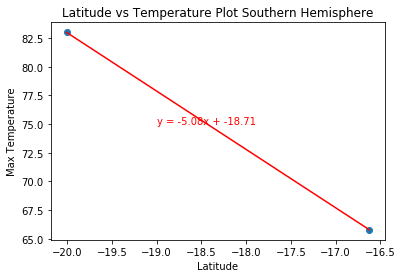

In [32]:
# identify x, y variables
x_values_southern = southern_df['Lat']
x_values_southern

y_values_southern_temp = southern_df['Temp. Max']
y_values_southern_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern,y_values_southern_temp)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_southern, y_values_southern_temp)

# add regression line
plt.plot(x_values_southern,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(-19,75),fontsize=10,color="red")

plt.title('Latitude vs Temperature Plot Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

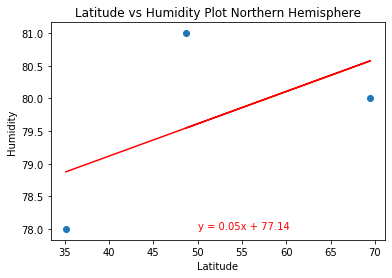

In [34]:
# identify x, y variables
x_values_northern = northern_df['Lat']
x_values_northern

y_values_northern_humidity = northern_df['Humidity']
y_values_northern_humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern,y_values_northern_humidity)
regress_values = x_values_northern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_northern, y_values_northern_humidity)

# add regression line
plt.plot(x_values_northern,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(50,78),fontsize=10,color="red")

plt.title('Latitude vs Humidity Plot Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [36]:
# identify x, y variables
x_values_southern = southern_df['Lat']
x_values_southern

y_values_southern_humidity = southern_df['Humidity']
y_values_southern_humidity

0    87
3    79
Name: Humidity, dtype: int64

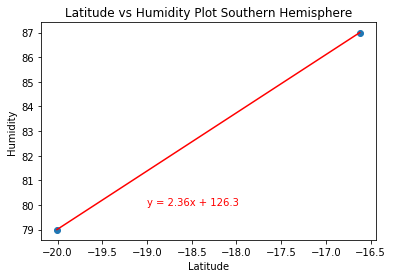

In [38]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern,y_values_southern_humidity)
regress_values = x_values_southern * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_southern, y_values_southern_humidity)

# add regression line
plt.plot(x_values_southern,regress_values,"r-")

# add line equation to my graph
plt.annotate(line_eq,(-19,80),fontsize=10,color="red")

plt.title('Latitude vs Humidity Plot Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression